# Chaine de Markov

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(precision=3,suppress=True)

## Préliminaires d'algèbre linéaire

Attention, en numpy les vecteurs, les matrices lignes et les matrices colonnes sont des objets différents:

* vecteur.shape = (?)
* matrice_ligne.shape = (1,?)
* matrice_colonne.shape = (?,1)
* matrice_quelconque.shape = (?,?)

Observez bien les sorties consoles: les vecteur s'écrivent avec 1 crochet, les matrices avec 2 crochets.



### Multiplication matricielle

`np.matmul()` s'applique uniquement entre matrices.

In [3]:
size=3
mat_col=np.ones(shape=[size,1])
mat_lin=np.ones(shape=[1,size])
mat_square=np.ones(shape=[size,size])

print("\nmat_col\n",mat_col)
print("\nmat_lin\n",mat_lin)
print("\nmat_square\n",mat_square)

print("\nmat_square × mat_col\n",np.matmul(mat_square,mat_col) )
print("\nmat_lin × mat_square\n",np.matmul(mat_lin,mat_square))
print("\nmat_lin × mat_square × mat_col\n", np.matmul(np.matmul(mat_lin,mat_square),mat_col))



mat_col
 [[1.]
 [1.]
 [1.]]

mat_lin
 [[1. 1. 1.]]

mat_square
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]

mat_square × mat_col
 [[3.]
 [3.]
 [3.]]

mat_lin × mat_square
 [[3. 3. 3.]]

mat_lin × mat_square × mat_col
 [[9.]]


sinon on peut utiliser `np.dot()` qui permet les multiplications matrice × vecteur, matrice × matrice, vecteur ×  vecteur (=produit scalaire)

In [4]:
size=3
vec0=np.ones(shape=[size])
vec1=2*np.ones(shape=[size])
mat_square=np.ones(shape=[size,size])

print("\nvec0 × vec1\n",np.dot(vec0,vec1))
print("\nvec0 × mat_square\n",np.dot(vec0,mat_square))
print("\nmat_square × vec0\n",np.dot(mat_square,vec0))
print("\nmat_square × mat_square\n",np.dot(mat_square,mat_square))


vec0 × vec1
 6.0

vec0 × mat_square
 [3. 3. 3.]

mat_square × vec0
 [3. 3. 3.]

mat_square × mat_square
 [[3. 3. 3.]
 [3. 3. 3.]
 [3. 3. 3.]]


et si vous avez python 3.5+, vous pouvez utilisez l'opérateur @ qui rend les codes plus lisible

In [5]:
print("\nvec0 × vec1\n",vec0 @ vec1)
print("\nvec0 × mat_square\n",vec0 @ mat_square)
print("\nmat_square × vec0\n",mat_square @ vec0)
print("\nmat_square × mat_square\n",mat_square @  mat_square)


vec0 × vec1
 6.0

vec0 × mat_square
 [3. 3. 3.]

mat_square × vec0
 [3. 3. 3.]

mat_square × mat_square
 [[3. 3. 3.]
 [3. 3. 3.]
 [3. 3. 3.]]


***Exo:*** Multipliez matriciellement des matrices de taille non-compatible.
Extrayez la partie intéressante du message d'erreur.

### inverse et transposée 

Notez que le pseudo-inverse permet d'inverser les matrices non-inversibles (testez). 

In [6]:
size=3
mat=np.zeros(shape=[size,size])
for i in range(size):
    mat[i,i]=1
mat[0,size-1]=2


print("\nmat\n",mat )
print("\nmat^T\n",mat.T)
print("\nmat^(-1)\n",np.linalg.inv(mat))
print("\nmat^(-1)-pseudo-inverse\n",np.linalg.pinv(mat))


mat
 [[1. 0. 2.]
 [0. 1. 0.]
 [0. 0. 1.]]

mat^T
 [[1. 0. 0.]
 [0. 1. 0.]
 [2. 0. 1.]]

mat^(-1)
 [[ 1.  0. -2.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]

mat^(-1)-pseudo-inverse
 [[ 1.  0. -2.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


### vecteur propre et valeur propre

Souvenez-vous qu'en anglais valeur/vecteur 'propre' c'est 'eigen' value/vector

In [7]:
size=4
"""une matrice aléatoire auquel on fait subir une opération de normalisation (laquelle?)"""
mat=np.random.uniform(low=0,high=10,size=[size,size])
rowSum=np.sum(mat,axis=1)
""" mat[i,j]=mat[i,j]/rowSum(i)  """
for i in range(size): mat[i,:]/=rowSum[i]

eigVal,eigVec=np.linalg.eig(mat)
print("\nmat\n", mat )
print("\neigVal\n",np.real(eigVal))
print("\neigVec\n", np.real(eigVec))


mat
 [[0.3   0.141 0.374 0.186]
 [0.303 0.297 0.205 0.195]
 [0.281 0.384 0.116 0.219]
 [0.173 0.284 0.01  0.534]]

eigVal
 [ 1.     0.327 -0.04  -0.04 ]

eigVec
 [[ 0.5    0.359 -0.765 -0.765]
 [ 0.5    0.361  0.302  0.302]
 [ 0.5    0.293  0.546  0.546]
 [ 0.5   -0.81   0.073  0.073]]


***A vous:*** 

* Pourquoi 1 est-il valeur propre ? Quel est le vecteur propre associé? `np.linalg.eig` donne-t-il les vecteurs propres à droite ou à gauche? Sont-ils disposés en ligne ou bien en colonne?

* Toutes les matrices sont-elles diagonalisables?  A quoi servent les np.real()?  

* laquelle de ces deux formules est la bonne ?

        Diag = P^-1 @ mat @ P   

ou

        Diag = P @ mat @ P^-1
        
Vérifiez avec python. Aide: Pour transformez un vecteur en matrice diagonale, utilisez `np.diag(vecteur)`

Attention, lorsqu'on part d'une matrice symétrique (ou hermitienne), pour obtenir la diagonalisation dans une base othornormale il faut utiliser `np.linalg.eigh` (h-comme hermitienne). Vérifiez-le!


## Définition intuitive d'une chaine de Markov

On considère un ensemble dénombrable $E$ : l'ensemble des "états". Par exemple   $E=\{0,1,2,3,4,5\}$.      On considère aussi que les éléments de $E$ sont des sommets d'un graphes, dont les flèches sont pondérées.  

![graph_ponder](./img/graph_ponder.png)

Une chaine de Markov $t\to X_t$  est un processus aléatoire qui se ballade en suivant le graphe. Au temps $t=0$ elle se trouve en une sommet $X_0$ donnée.  Si au temps $t$ elle se trouve en $X_t$, elle tire une des fléches partant de $X_t$,  avec une probabilités proportionnelle aux pondérations, et elle suit cette flèche pour arriver à un nouvel état $X_{t+1}$

***Remarque:***  Ici, les étiquettes que l'on a mis sur les états n'ont aucune importance. On aurait pu tout aussi bien prendre $E=\{A,B,C,E,D,F\}$. Dans les exemple suivants, le fait que les indexes soient des entiers aura son importance.   

In [8]:
def premier_chaine():
    P=np.zeros([6,6])
    P[0,3]=4
    P[1,0]=2.1
    P[2,1]=2.5
    P[3,1]=3
    P[3,4]=2
    P[4,1]=2
    P[4,2]=0.2
    P[4,5]=6
    P[5,2]=7.3
    sumLine=np.sum(P,axis=1)
    """ P[i,j]=P[i,j]/sumLine[i] """
    P/=np.expand_dims(sumLine,axis=1)
    return P

print(premier_chaine())

[[0.    0.    0.    1.    0.    0.   ]
 [1.    0.    0.    0.    0.    0.   ]
 [0.    1.    0.    0.    0.    0.   ]
 [0.    0.6   0.    0.    0.4   0.   ]
 [0.    0.244 0.024 0.    0.    0.732]
 [0.    0.    1.    0.    0.    0.   ]]


In [9]:
def markov_from_P(t_max,P,x0):
    X=np.zeros(t_max,dtype=np.int)
    X[0]=x0
    for t in range(t_max-1):
        X[t+1]=np.random.choice(a=range(len(P)),p=P[X[t],:])
    return X


t_max=300
X=markov_from_P(t_max,P,3)
plt.figure(figsize=(20,3))
plt.plot(range(t_max),X);
plt.grid()



NameError: name 'P' is not defined

## Exemples: Marches aléatoires

Les marches aléatoire sont des chaines de Markov qui possède en plus une certaine invariance en espace.  Donnons 3 exemples :



* La marche aléatoire simple sur $E=\mathbb Z$: elle monde de 1 ou descend de 1 avec proba $\frac 12$.   

* marche aléatoire non-simple: elles montent et descendent selon une loi donnée (pas forcément portée par {-1,+1}). Par exemple les sauts possibles sont {+1,+2,-1} avec proba {1/3,1/3,1/3}, quelle sera d'après vous la destination de cette marche aléatoire


* La marche aléatoire simple absorbée sur $E=\{0,1,...,n-1\}$. Elle monte ou descent avec proba $\frac 12$. Une fois arrivée en $0$ ou en $n-1$, elle reste dans ces états. 

*  La marche aléatoire simple réfléchie sur $E=\{0,1,...,n-1\}$. Elle monte ou descent avec proba $\frac 12$. Une fois arrivée en $0$ elle monte en 1,  une fois arrivée en $n-1$ elle descent en $n-2$.  



***A vous:*** Simulez ces marché aléatoire. pour les marches sur $E=\{0,1,...,n-1\}$, utilisez la technique précédente qui utilise `np.random.choice`. Pour les marches sur $\mathbb Z$, inventez une technique.  


***Généralisation:*** On peut aussi imaginez des marches sur $\mathbb R$ (par exemple qui saute selon des loi gaussiennes). Mais cela sort du cadre classique. 


## Formalisation

***Définition*** Une chaine de Markov générale est une fonction  aléatoire (=un processus) $t \to X_t$ qui prend en $t=0$ une valeur $X_0$ donnée (possiblement aléatoire) et qui ensuite est régie par l'équation:
$$
X_{t+1} = f_{t+1} (X_t, U_{t+1})   
$$
avec 
* f_{t+1} fonction
* U_{t+1} v.a indépendante de tous les tirages aléatoires précédents, à savoir $X_0, U_1,U_2,...,U_t$. 

Si de plus, les $f_t$ sont toutes les même, on parle de chaine de Markov homogène dans le temps. La plupart du temps, le terme "chaines de Markov" sous entend  "homogène dans le temps". 




### Propriété fondamentale


***Théorème:***  Considérons $t\to X_t$ une chaine de Markov générale.  La loi  de $X_{t+1}$ est indépendante de $X_{0},...,X_{t-1}$ sachant $X_t$:
$$
\mathbf P[X_{t+1} = x_{t+1} /X_t = x_t ,  X_{t-1}=x_{t-1} ,..., X_{0}=x_0  ] =    \mathbf P[X_{t+1} = x_{t+1} /X_t = x_t   ]  
$$
Si de plus elle est homogène alors
$$
\mathbf P[X_{t+1} = y /X_t = x   ] = \mathbf P[X_{1} = y /X_0 = x   ] 
$$


Ce théorème admet une réciproque: si un processus $(X_t)$ satisfait la première équation (resp. et la seconde) alors c'est une chaine de Markov (resp. homogène dans le temps).


Attention: dans les livres de maths, on utilise la propriété d'indépendance conditionnelle pour définir une chaine de Markov. La définition que j'ai choisi est plus proche de la pratique: les chaines de Markov étant toujours construite à l'aide d'une l'équation $X_{t+1} = f_{t+1} (X_t, U_{t+1}) $ plus ou moins cachée. Par exemple, dans le programme précédent:

    X[t+1]=np.random.choice(a=range(6),p=P[X[t],:])
          = fonction(X[t], rand() )
          
où la fonction `rand()` symbolise l'appel du générateur aléatoire de notre ordinateur. Chaque appelle donnant un réel aléatoire uniforme sur `[0,1]` indépendant de tout les tirages précédent. 




## Probabilité/mesure invariante

On appelle mesure invariante une probabilité  $\pi$ sur $E$ vérifiant $\pi P=\pi$. Elle satisfait donc le système linéaire:

$$
\forall x\in E :  \sum_x \pi(x) P(x,y) = \pi(x)
$$
Si de plus $\pi$ vérifie $\sum_{x\in E} \pi(x)=1$ alors on parle de probabilité invariante.

***Théorème:*** Il existe toujours une mesure invariante. 

***Corrolaire:*** Quand $E$ est fini, il existe toujours une probabilité invariante: il suffit de renormaliser une mesure invariante $\pi$, en la divisant par sa passe totale $\sum_x \pi(x)$. 

***A vous:***

* Reconsidérons la marche aléatoire simple sur $\mathbb Z$. Donnez une mesure invariante (essayez de résoudre le système avec un $\pi$ très très simple). Peut-on la renormaliser pour en faire une proba invariante?  Qu'en est-il de la marche aléatoire non-simple?

* Plaçons nous dans le cas $E$ fini. Dans ce cas $P$ est une matrice. Trouvez l'argument d'algèbre linéaire qui démontre le premier théorème: Aide: il y a un vecteur propre à droite très facile à trouver pour $P$...

val_pr
 [ 1.    -0.461 -0.461 -0.706  0.313  0.313]
vec_pr
 [[ 0.25   0.26   0.26  -0.403 -0.171 -0.171]
 [ 0.25   0.278  0.278  0.284  0.139  0.139]
 [ 0.076 -0.184 -0.184 -0.464  0.527  0.527]
 [ 0.25  -0.564 -0.564  0.57  -0.544 -0.544]
 [ 0.1    0.113  0.113 -0.323 -0.151 -0.151]
 [ 0.073  0.097  0.097  0.335  0.199  0.199]]


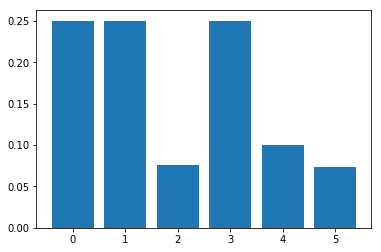

In [18]:
""" calculons l'unique probabilité invariante de notre chaine de Markov"""
def mesure_invariante(P):
    val_pr,vec_pr=np.linalg.eig(P.T)
    val_pr=np.real(val_pr)
    vec_pr=np.real(vec_pr)
    pi=vec_pr[:,0]
    pi/=np.sum(pi)
    print("val_pr\n",val_pr)
    print("vec_pr\n",vec_pr)
    return pi

P=premier_chaine()
pi=mesure_invariante(P)
plt.bar(range(6),pi);

***A vous:*** Pourquoi transpose-t-on la matrice dans `np.linalg.eig(P.T)`?

## théorème ergodique

***NB:*** A partir de maintenant, nous supposons que l'espace d'état $E$ est fini. Dans une dernière partie, nous verrons les difficultés qui se raoutent dans le cas infini. Notamment on introduira la dichotomie transient/récurent.



On dit qu'un graphe est ***irréductible*** lorsque l'on peut toujours aller d'un état à l'autre en suivant les flèches. On dit qu'une chaine de Markov est irréductible quand son graphe l'est. 


***Théorème:*** Lorsque la chaine de Markov fini est irréductible, il n'y a qu'une seule mesure invariante, à une constante multiplicative près. 

***A vous:*** Comment traduiriez-vous ce théorème en terme d'algèbre linéaire?

Notons maintenant $X^x_t$ la chaine de Markov qui part du point $x$. Notons:

$$
  \Gamma_{T}^x(y) =\frac 1 T  \sum_{t=0}^{T-1}  1_{\{X^x_t = y  \}}
$$
C'est le temps moyen passé dans l'état $y$ en partant de $x$.  


***Théorème ergodique:*** Quand $T$ tend vers l'infini: 

* $\Gamma_{T}^x$ converge vers une probabilité invariante. 
* Quand la chaine est irréductible, il converge donc vers l'unique probabilité invariante, et ainsi la limite ne dépend pas du point de départ $x$.


[0.25  0.25  0.077 0.25  0.099 0.075]


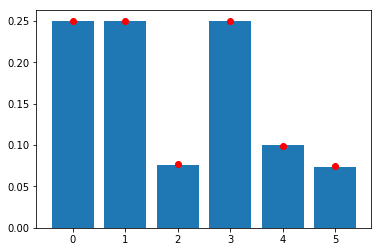

In [25]:
t_max=5000
P=premier_chaine()
X=markov_from_P(t_max,P,3)
Gamma=np.zeros(6)
for i in range(6):
    Gamma[i]=np.mean(X==i)
print(Gamma)
plt.bar(range(6),pi)
plt.plot(range(6),Gamma,"o",c="red");

***A vous:*** modifiez ce programme pour mettre en évidence la convergence: vous pouvez effectuer des moyennes à différents temps, et les afficher comme des petits points qui se rapprochent des points rouges ci-dessus. Attention il y a une erreur à ne pas faire (la même erreur que l'on fait souvent quand on veut illustrer la loi forte des grands nombres).

### Marche aléatoire absorbée: un exemple réductible


***Définition:*** Un état absorbant est un état duquel la chaine ne peut pas sortir. Par exemple, la marche aléatoire absorbée admet deux points absorbant: $0$ et $n-1$. 

***Exo:*** Considérons la marche absorbée. 

*   Montrez mathématiquement qu'il n'y a pas unicité de la probabilité invariante. 
*   Notons $\Gamma_\infty^x =\lim_T\Gamma_T^x$. Quelle est son interprétation probabiliste. Intuitez qu'elle dépend de $x$. Est-ce en constradiction avec le théorème ergodique?
*   A l'aide de simulations, tracez les courbe $x \to  \Gamma_\infty^x (0)$ et $x \to  \Gamma_\infty^x (n-1)$. Est-ce en accord avec votre intuition.  Aide: vous devez simulez la marche aléatoire jusqu'à ce qu'elle touche 0 ou 1. Il faut donc utiliser une boucle `while` (ou un `for...break`). Il ne faut donc par recopier le programme ci-dessous!

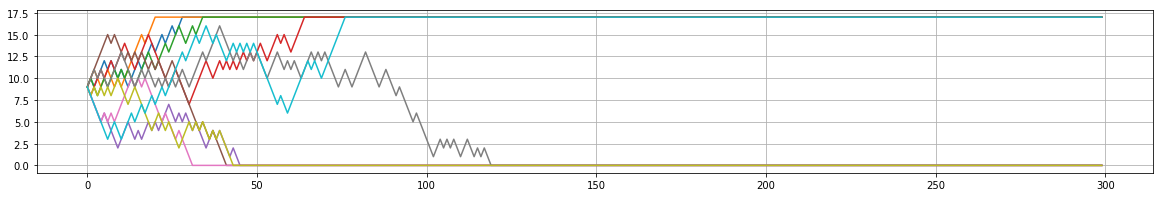

In [23]:
def marche_absorb(n):
    P=np.zeros([n,n])
    for i in range(1,n-1): 
        P[i,i+1]=0.5
        P[i,i-1]=0.5
    P[0,0]=1
    P[-1,-1]=1
    return P


t_max=300
nb_essaies=10
plt.figure(figsize=(20,3))
plt.grid()
n=18
P=marche_absorb(n)
for i in range(nb_essaies):
    X=markov_from_P(t_max,P,n//2)
    plt.plot(range(t_max),X)
    



Faites tourner ce programme en variant les points de départs. Que constatez-vous?

### Calcul exacte de la probabilité d'absorbtion

Considérons la probabilité que la chaine soit absorbée en 0:
$$
\gamma(x) = \mathbf P_x[X_\infty=0] = \Gamma_\infty^x(0)
$$

***Lemme:*** Le vecteur $\gamma$ vérifie $P\gamma=\gamma$. 

En effet
$$
\begin{aligned}
P\gamma(x)& = \sum_y P(x,y) \gamma(y) =   \sum_y P(x,y) \mathbf P_y[\lim_n X_n = 0   ]    \\
&= \dots
\end{aligned}
$$
Completez, en n'oubliant pas de justifier les interversion entre les limites et les espérances. 


Ainsi $\gamma$ vérifiez les trois propriétés suivantes:

* C'est un vecteur propre à gauche de $P$ associé à la valeur propre 1. 
* $\gamma(0)=1$.
* $\gamma(n-1)=0$. 

***A vous:*** Déduisez la fin du résonnement en observant le programme ci-dessus. 

val_pr
 [-0.707  0.     0.707  1.     1.   ]
vec_pr
 [[ 0.     0.     0.     0.73   0.   ]
 [ 0.5    0.707 -0.5    0.548  0.183]
 [-0.707 -0.    -0.707  0.365  0.365]
 [ 0.5   -0.707 -0.5    0.183  0.548]
 [ 0.     0.     0.     0.     0.73 ]]
f: [0.    0.183 0.365 0.548 0.73 ]
g: [0.73  0.548 0.365 0.183 0.   ]
M
 [[0.   0.73]
 [0.73 0.  ]]


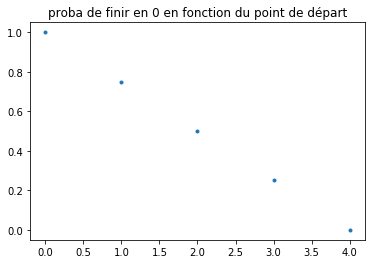

In [13]:
n=5
P=marche_absorb(n)

val_pr,vec_pr=np.linalg.eig(P)
val_pr=np.real(val_pr)
vec_pr=np.real(vec_pr)

""" on voit qu'il y a 2 vecteurs propres associés à la valeur propre 1. 
Attention: elles sont à la fin.
On les notes f et g"""
print("val_pr\n",val_pr)
print("vec_pr\n",vec_pr)
f=vec_pr[:,-1]
g=vec_pr[:,-2]
print("f:",f)
print("g:",g)

M=np.array([[f[0],g[0]],[f[n-1],g[n-1]]])
print("M\n",M)
ab=np.linalg.inv(M) @ [1,0]
gamma=ab[0]*f+ab[1]*g

plt.plot(range(n),gamma,".")
plt.title("proba de finir en 0 en fonction du point de départ");


Remarquons que la technique que nous avons utilisé marcherait pour n'importe quelle chaine de markov avec 2 points absorbants. N'hésitez pas à en inventez une.

***Exo:*** Le programme précédent n'est pas très robuste car les vecteur propres  proposé par `np.linalg.eig` sont classé dans un ordre que nous ne maitrisons pas. Modififez ce programme pour qu'il fonctionne quel que soit cet ordre.

## Convergence en loi


### apériodique

Considérons une graph irréductible orienté. Il est périodique, de période $n>1$, lorsque tous les boucles qu'on peut faire en suivant les arrêtes du graphes on une longueur multiple de $n$. 

Remarques:

* Grâce à l'irréductibilité, il suffit de tester les boucles issues d'une état donné. 

* Pour montrez qu'un graphe est apériodique, il suffit de trouver un état $x_0$ est de trouver deux boucles issues de $x_0$ dont le pcgd des longueurs est 1. 


*** Théorème (convergence en loi):*** Considérons une chaine de Markov irréductible apériodique. Alors $(X_t)$ converge en loi vers  l'unique probabilité invariante. 


***A vous:*** Vérifiez que cette convergence en loi équivaut au fait que toutes les lignes de $P^t$ converge vers $\pi$.



val_pr
 [ 1.    -0.461 -0.461 -0.706  0.313  0.313]
vec_pr
 [[ 0.25   0.26   0.26  -0.403 -0.171 -0.171]
 [ 0.25   0.278  0.278  0.284  0.139  0.139]
 [ 0.076 -0.184 -0.184 -0.464  0.527  0.527]
 [ 0.25  -0.564 -0.564  0.57  -0.544 -0.544]
 [ 0.1    0.113  0.113 -0.323 -0.151 -0.151]
 [ 0.073  0.097  0.097  0.335  0.199  0.199]]


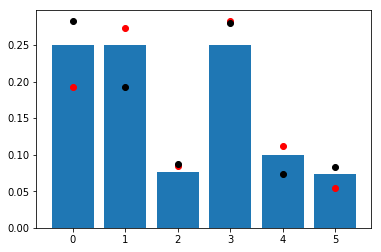

In [24]:
P=premier_chaine()

pi=mesure_invariante(P)
P_infty=np.linalg.matrix_power(P,50)

plt.bar(range(6),pi);
plt.plot(P_infty[0,:],"o",c="red")
plt.plot(P_infty[1,:],"o",c="k");

Avec $t=50$ cela n'a pas encore bien converger. Comment expliquez-vous la grosse différence entre les points rouges et noire sur les deux premier état? (aide:observez le graphe de la chaine)